In [1]:
# Start with a custom working directory
remotes::install_github("peeter-t2/digar.txts",lib="R_pckg/",upgrade="never")

* checking for file ‘/tmp/Rtmp3yHcPp/remotesc77b69af2eb3/peeter-t2-digar.txts-b87e10a/DESCRIPTION’ ... OK
* preparing ‘digar.txts’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘digar.txts_0.0.0.9100.tar.gz’
Warning in sprintf(gettext(fmt, domain = domain), ...) :
  one argument not used by format 'invalid uid value replaced by that for user 'nobody''



In [1]:
library(digar.txts,lib.loc="R_pckg/")
library(tidyverse)

Loading required package: data.table

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [6]:
all_issues <- get_digar_overview() #saame kõik olemasolevad lehed
subset_ek <- all_issues %>%
            filter(language=="Estonian")

[1] "Issue metadata read"


## Failid

Searchterm on see sõna, mida tahad otsida.
<br>
Searchfile all saad panna sellele failile nime, kuhu tulemus salvestatakse
<br>
subset_ek on korpuse kõik eestikeelsed tekstid, kust sõna hakatakse otsima
<br>
Lemmatiseeritud tekstide jaoks on see 'searchtype="lemmas"
<br>
Lisage failinimesse, mis keelest ta on (eesti, vene, saksa või inglise), nt kampsun_eesti.txt, pullover_inglise.txt, sviiter_vene.txt
<br>
### NB! Kõigile otsingusõnadele lisada ette ja taha \\\b nagu allpool kujutatud. 
Nii välistatakse juhud, et otsides sõna 'kamp' leitakse ka 'kampsun'

In [10]:
do_subset_search(searchterm="\\bjumestus\\b", searchfile="jumestus_eesti.txt",subset_ek, searchtype="lemmas")
do_subset_search(searchterm="\\bmeik\\b", searchfile="meik_inglise.txt",subset_ek, searchtype="lemmas")
do_subset_search(searchterm="\\bgrimm\\b", searchfile="grimm_vene.txt",subset_ek, searchtype="lemmas")
do_subset_search(searchterm="\\bmink\\b", searchfile="mink_saksa.txt",subset_ek, searchtype="lemmas") 

## Iga aasta kohta sõnade arv
Kui wordcounts_per_year_est on olemasm siis ära jooksuta.

In [6]:
meta <- get_subset_meta(subset_ek)
#siit leiame, mitu sõna iga aasta kohta oli ja salvestame selle muutujasse wordcounts
wordcounts <- meta %>% 
  group_by(year) %>% 
  summarise(words=sum(LogicalSectionTextWordCount))
fwrite(wordcounts,"wordcounts_per_year_est.tsv",sep="\t")

Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpaL7kcT/file177a50c69dfa' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpaL7kcT/file177a3594ca9f' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpaL7kcT/file177a4adec2c1' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpaL7kcT/file177a449800e2' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpaL7kcT/file177a6783a956' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpaL7kcT/file177a5be729ba' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpaL7kcT/file177a1dabf9f4' has size 0. Returning a NULL data.table.”
Warning message in d

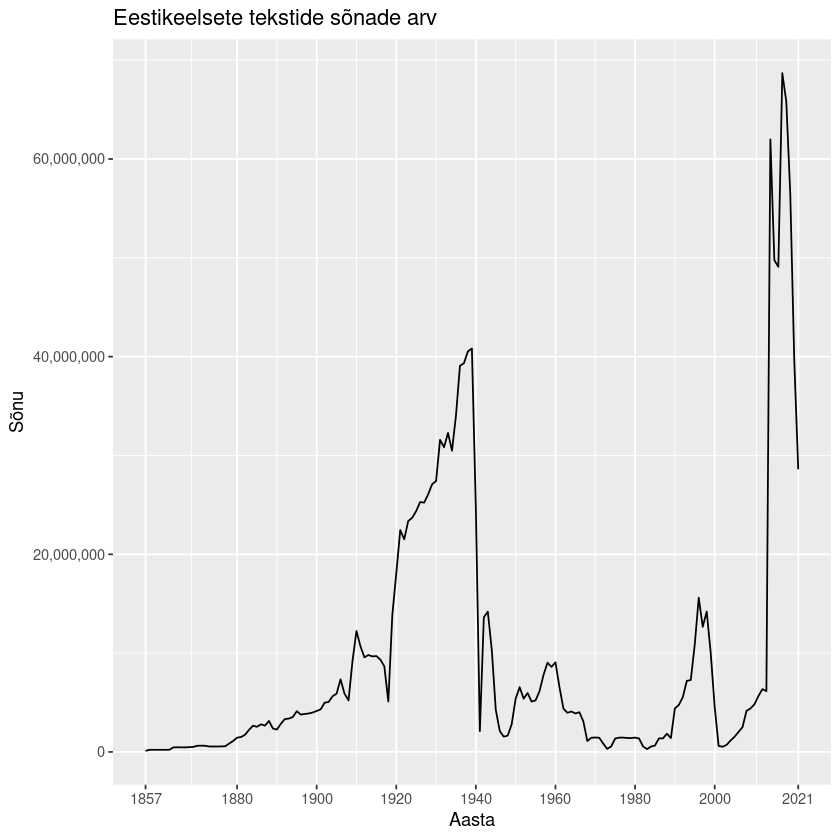

In [3]:
wordcounts <- read.table(file = 'wordcounts_per_year_est.tsv', sep = '\t', header = TRUE)
library(ggplot2)
ggplot(data=wordcounts, aes(x=year, y=words, group=1)) + #kust andmed, mis andmed on x ja mis y telg
    geom_line()+ #joongraagik
    labs( #muudame nimesid
        title = "Eestikeelsete tekstide sõnade arv",
        x = "Aasta",
        y = "Sõnu"
    ) +
    scale_x_continuous(breaks = c(1857, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2021)) + #ütleme, mis vahemik x teljel peab olema
    scale_y_continuous(labels = scales::comma)
ggsave("wordcounts.png", width = 1200, height = 1200, units = "px") #salvestame graafiku png failina

# Teeb üle kaustade omasõna, eestindatud vormi ja võõrsõna võrdlemiseks graafikud ja tabelid
## Siin plokis on eeltöö
Esimese rea jutumärkide juures saad muuta suure kausta nime, kust hiljem hakatakse alamkaustu välja võtma.

In [2]:
#jutumärkide vahele lisa kausta nimi, kus on alamkaustad iga sõnapaari/kolmiku jaoks
alamkaustad <- list.dirs("tekstid", recursive = FALSE)
#nendesse salvestatakse sõnade mainimise arv aasta kaupa, et saaks pärast teha kõigi sõnade peale tabeli ja graafiku
aastad_kokku_eesti <- c()
aastad_kokku_vene <- c()
aastad_kokku_saksa <- c()
aastad_kokku_inglise <- c()
#siin loetakse sisse, mitu sõna kõigi korpuse artiklite peale aasta kaupa oli
wordcounts <- read.table(file = 'wordcounts_per_year_est.tsv', sep = '\t', header = TRUE)
#siit saame listi kõikide korpuses olevate aastate kohta
koik_aastad <- wordcounts$year

## Siin plokis on tsükkel, mis tekitab iga mõiste kohta graafikud ja tabelid
Et see töötaks, on vaja teha kõigepealt üks suur kaust, nt 'koik_keeled'. Seejärel saab lisada sinna alamkaustu. Ühes alamkaustas on ühe mõiste kohta käivad sõnad, mille failinimes peab avalduma, mis tüüpi sõnaga on tegu (kas eesti omasõna, saksa, vene või inglise laen, nt 'jumestus_eesti.txt', 'grimm_vene.txt', 'meik_inglise.txt', 'mink_saksa.txt'). Alamkausta nimi, kus need failid on, võiks kajastada kõiki neid sõnu (nt 'jumestus_meik_grimm_mink'), sest kausta nimi muudetakse hiljem graafiku pealkirjaks.
<br>
### NB! Mõelge täpselt, kuhu tahate tulemusi salvestada. Minul näeb failipuu välja selline:
-kodu <br>
---- koik_keeled (siin on kood) <br>
-------- graafikud <br>
-------- tabelid <br>
------------ normitud <br>
------------ tavalised <br>
-------- tekstid <br>
------------ jumestus_meik_grimm_mink <br>
------------------ jumestus_eesti.txt <br>
------------------ grimm_vene.txt <br>
------------------ meik_inglise.txt <br>
------------------ mink_saksa.txt <br>
<br>
Kui teil on samasugune failipuu, siis pole vaja koodis midagi muuta. Kui te aga tahaks midagi teisiti teha, otsi koodist sõna 'path' ja leiate kõik kohad, kus seda muuta saad. See keskkond arvestab koduks selle koha, kus kood on, nii et kui tahta nt, et fail salvestatakse kohta "kodu/koik_keeled/graafikud", peab kirjutama pathiks ainult "graafikud". 

In [3]:
for (kaust in alamkaustad) {
    if (grepl(".ipynb_checkpoints", kaust, fixed = TRUE)) {
        next
    }
    else{
        print(kaust)
        #listid normaliseeritud tulemuste lisamiseks
        eesti <- c() 
        vene <- c() 
        saksa <- c() 
        inglise <- c()
        #listid normaliseerimata tulemuste lisamiseks
        eesti_tava <- c() 
        vene_tava <- c() 
        saksa_tava <- c() 
        inglise_tava <- c() 
        files <- list.files(path=kaust, pattern="*.txt", full.names=TRUE, recursive=FALSE)
        kaust_nimi <- basename(kaust) #ainult kaustanimi
        for (file in files) {
            fn <- basename(file)
            i <- 0 #teeme loenduri
            sonu <- c() #teeme tühja listi
            normitud <- c() #uus tühi list
            #muudame esinemised tabeliks, kus ühes tulbas on faili id ja teises tekst
            tabel <- fread(file,sep ="\t",quote="",fill=TRUE,header=FALSE)[,.(id=V1,txt=V2)]
            #paneme id'd eraldi listi
            ided <- tabel$id
            #võtame id'st aasta välja  
            aastad = as.numeric(gsub("[a-zöäüõA-ZÕÜÖÄ]+([0-9]{4}).+", "\\1", ided))
            #lisame selle sõna kõik aastad aastate kollektiivsesse listi vastavalt ta tüübile
            if (grepl("eesti", file, fixed = TRUE)) { #kui failinimes on eesti
                #salvestame kollektiivsesse listi selle sõna aastad
                aastad_kokku_eesti <- append(aastad_kokku_eesti, aastad)
                #salvestame sõna nime uude muutujasse, et see pärast tabelis veerunimeks panna
                fn_eesti <- str_extract(fn, ".+[^_eesti.txt)]")
                    }
            if (grepl("vene", file, fixed = TRUE)) { #kui failinimes on vene
                #salvestame kollektiivsesse listi selle sõna aastad
                aastad_kokku_vene <- append(aastad_kokku_vene, aastad)
                #salvestame sõna nime uude muutujasse, et see pärast tabelis veerunimeks panna
                fn_vene <- str_extract(fn, ".+[^_vene.txt)]")
                    }
            if (grepl("saksa", file, fixed = TRUE)) { #kui failinimes on saksa
                #salvestame kollektiivsesse listi selle sõna aastad
                aastad_kokku_saksa <- append(aastad_kokku_saksa, aastad)
                #salvestame sõna nime uude muutujasse, et see pärast tabelis veerunimeks panna
                fn_saksa <- str_extract(fn, ".+[^_saksa.txt)]")
                    }
            if (grepl("inglise", file, fixed = TRUE)) { #kui failinimes on inglise
                #salvestame kollektiivsesse listi selle sõna aastad
                aastad_kokku_inglise <- append(aastad_kokku_inglise, aastad)
                #salvestame sõna nime uude muutujasse, et see pärast tabelis veerunimeks panna
                fn_inglise <- str_extract(fn, ".+[^_inglise.txt)]")
                    }
            sonu_aastate_kaupa <- table(aastad)
            for (aasta in koik_aastad) { #üle kõigi aastate, millest korpuses üldse tekste on
                i <- i+1 #lisame loendurile ühe
                if (aasta %in% aastad) { #kui sel aastal on ka mainitud meie uuritavat sõna
                    mitu_mainimist <- sonu_aastate_kaupa[[as.character(aasta)]] #leiab, mitu korda seda sõna sel aastal mainiti
                    sonu_aastas <- wordcounts[[2]][[i]] #mitu sõna ühe aasta tekstide peale kokku oli
                    norm <- (mitu_mainimist/sonu_aastas)*10000000 #jagame selle aasta sõna mainimise arvu selle aasta kollektiivsete sõnade arvuga ja korrutame konstandiga, et tulemus oleks loetavam
                    if (grepl("eesti", file, fixed = TRUE)) { #kui failinimes on eesti
                        eesti <- append(eesti, norm) #lisab selle aasta normitud sõna mainimiste arvu listi
                        eesti_tava <- append(eesti_tava, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                    }
                    if (grepl("vene", file, fixed = TRUE)) { #kui failinimes on vene
                        vene <- append(vene, norm) #lisab selle aasta normitud sõna mainimiste arvu listi
                        vene_tava <- append(vene_tava, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                    }
                    if (grepl("saksa", file, fixed = TRUE)) { #kui failinimes on saksa
                        saksa <- append(saksa, norm) #lisab selle aasta sõna normitud mainimiste arvu listi
                        saksa_tava <- append(saksa_tava, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                    }
                    if (grepl("inglise", file, fixed = TRUE)) { #kui failinimes on inglise
                        inglise <- append(inglise, norm) #lisab selle aasta sõna normitud mainimiste arvu listi
                        inglise_tava <- append(inglise_tava, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                    }
                }
                else { #kui sel aastal polnud ühtegi sõna mainimist
                    if (grepl("eesti", file, fixed = TRUE)) { #kui failinimes on eesti
                        eesti <- append(eesti, 0) #lisab selle aasta normitud sõna mainimiste arvu listi
                        eesti_tava <- append(eesti_tava, 0) #lisab selle aasta sõna mainimiste arvu listi
                    }
                    if (grepl("vene", file, fixed = TRUE)) { #kui failinimes on vene
                        vene <- append(vene, 0) #lisab selle aasta normitud sõna mainimiste arvu listi
                        vene_tava <- append(vene_tava, 0) #lisab selle aasta sõna mainimiste arvu listi
                    }
                    if (grepl("saksa", file, fixed = TRUE)) { #kui failinimes on saksa
                        saksa <- append(saksa, 0) #lisab selle aasta sõna normitud mainimiste arvu listi
                        saksa_tava <- append(saksa_tava, 0) #lisab selle aasta sõna mainimiste arvu listi
                    }
                    if (grepl("inglise", file, fixed = TRUE)) { #kui failinimes on inglise
                        inglise <- append(inglise, 0) #lisab selle aasta sõna normitud mainimiste arvu listi
                        inglise_tava <- append(inglise_tava, 0) #lisab selle aasta sõna mainimiste arvu listi
                    }
                }
            }
        }
        
        #tabeli salvestamiseks csv faili nimi ja kaust
        csv_nimi_norm <- paste(kaust_nimi, "tabel_norm.csv", sep="_")
        csv_nimi_norm_path <- paste("tabelid/normitud", csv_nimi_norm, sep="/")
        csv_nimi_tava <- paste(kaust_nimi, "tabel_tava.csv", sep="_")
        csv_nimi_tava_path <- paste("tabelid/tavalised", csv_nimi_tava, sep="/")
        if (length(vene)== 0) { #kui vene laenu ei ole
            colors <- c("Eesti omasõna" = "blue", "Saksa laen" = "orange", "Inglise laen" = "green")
            #teeme ühe suure tabeli, kus on aastad, eesti omasõna normitud arv, saksa laenu normitud arv ja inglise laenu normitud arv
            graafikuks <- data.frame(koik_aastad, eesti, saksa, inglise) 
            #teeme ühe suure tabeli, kus on aastad, eesti omasõna arv, saksa laenu arv ja inglise laenu arv
            tabeliks <- data.frame(koik_aastad, eesti_tava, saksa_tava, inglise_tava) 
            tabeliks[nrow(tabeliks) + 1,] = c("Summa",sum(eesti_tava), sum(saksa_tava), sum(inglise_tava)) #lisame tabelisse veergude summad
            #muudame tabelite veerunimesid
            colnames(graafikuks) <- c('aasta',fn_eesti, fn_saksa, fn_inglise)
            colnames(tabeliks) <- c('aasta',fn_eesti, fn_saksa, fn_inglise)
            #kirjutame tabelid csv faili
            write.csv(graafikuks, csv_nimi_norm_path, row.names = FALSE) 
            write.csv(tabeliks, csv_nimi_tava_path, row.names = FALSE) 
            #teeme normaliseeritud andmete põhjal graafiku
            ggplot(graafikuks, aes(x=koik_aastad)) +
                geom_line(aes(y=eesti, color="Eesti omasõna"), alpha = 0.4, size = 0.3) +
                geom_line(aes(y=saksa, color="Saksa laen"), alpha = 0.4, size = 0.3) +
                geom_line(aes(y=inglise, color="Inglise laen"), alpha = 0.4, size = 0.3) +
                labs( #muudame nimesid
                    title = kaust_nimi,
                    x = "Aasta",
                    y = "Mainimiste osakaal",
                    color = "Legend"
                ) +
                scale_color_manual(values = colors) +
                scale_x_continuous(limits = c(1857, 2021), breaks=c(1857,1880,1900,1920,1940,1960,1980,2000,2021)) + #ütleme, mis vahemik x-teljel peab olema
                theme(text = element_text(size = 8)) 
            graafik_nimi <- paste(kaust_nimi, "graafik.png", sep="_")
            ggsave(graafik_nimi, path = "graafikud",width = 1500, height = 800, units = "px") #salvestame graafiku png failina 
            }  
        else if (length(saksa)== 0) { #kui saksa laenu ei ole
            colors <- c("Eesti omasõna" = "blue", "Vene laen" = "red", "Inglise laen" = "green")
            #teeme ühe suure tabeli, kus on aastad, eesti omasõna normitud arv, vene laenu normitud arv ja inglise laenu normitud arv
            graafikuks <- data.frame(koik_aastad, eesti, vene, inglise) 
            #teeme ühe suure tabeli, kus on aastad, eesti omasõna arv, vene laenu arv ja inglise laenu arv
            tabeliks <- data.frame(koik_aastad, eesti_tava, vene_tava, inglise_tava) 
            tabeliks[nrow(tabeliks) + 1,] = c("Summa",sum(eesti_tava), sum(vene_tava), sum(inglise_tava)) #lisame tabelisse veergude summad
            #muudame tabelite veerunimesid
            colnames(graafikuks) <- c('aasta',fn_eesti, fn_vene, fn_inglise)
            colnames(tabeliks) <- c('aasta',fn_eesti, fn_vene, fn_inglise)
            #kirjutame tabelid csv faili
            write.csv(graafikuks, csv_nimi_norm_path, row.names = FALSE) 
            write.csv(tabeliks, csv_nimi_tava_path, row.names = FALSE) 
            #teeme normaliseeritud andmete põhjal graafiku
            ggplot(graafikuks, aes(x=koik_aastad)) +
                geom_line(aes(y=eesti, color="Eesti omasõna"), alpha = 0.4, size = 0.3) +
                geom_line(aes(y=vene, color="Vene laen"), alpha = 0.4, size = 0.3) +
                geom_line(aes(y=inglise, color="Inglise laen"), alpha = 0.4, size = 0.3) +
                labs( #muudame nimesid
                    title = kaust_nimi,
                    x = "Aasta",
                    y = "Mainimiste osakaal",
                    color = "Legend"
                ) +
                scale_color_manual(values = colors) +
                scale_x_continuous(limits = c(1857, 2021), breaks=c(1857,1880,1900,1920,1940,1960,1980,2000,2021)) + #ütleme, mis vahemik x teljel peab olema
                theme(text = element_text(size = 8)) 
            graafik_nimi <- paste(kaust_nimi, "graafik.png", sep="_")
            ggsave(graafik_nimi, path = "graafikud",width = 1500, height = 800, units = "px") #salvestame graafiku png failina 
            }  
        else if (length(inglise)== 0) { #kui inglise laenu ei ole
            colors <- c("Eesti omasõna" = "blue", "Saksa laen" = "orange", "Vene laen" = "red")
            #teeme ühe suure tabeli, kus on aastad, eesti omasõna normitud arv, saksa laenu normitud arv ja vene laenu normitud arv
            graafikuks <- data.frame(koik_aastad, eesti, saksa, vene) 
            #teeme ühe suure tabeli, kus on aastad, eesti omasõna arv, saksa laenu arv ja vene laenu arv
            tabeliks <- data.frame(koik_aastad, eesti_tava, saksa_tava, vene_tava) 
            tabeliks[nrow(tabeliks) + 1,] = c("Summa",sum(eesti_tava), sum(saksa_tava), sum(vene_tava)) #lisame tabelisse veergude summad
            #muudame tabelite veerunimesid
            colnames(graafikuks) <- c('aasta',fn_eesti, fn_saksa, fn_vene)
            colnames(tabeliks) <- c('aasta',fn_eesti, fn_saksa, fn_vene)
            #kirjutame tabelid csv faili
            write.csv(graafikuks, csv_nimi_norm_path, row.names = FALSE) 
            write.csv(tabeliks, csv_nimi_tava_path, row.names = FALSE) 
            #teeme normaliseeritud andmete põhjal graafiku
            ggplot(graafikuks, aes(x=koik_aastad)) +
                geom_line(aes(y=eesti, color="Eesti omasõna"), alpha = 0.4, size = 0.3) +
                geom_line(aes(y=saksa, color="Saksa laen"), alpha = 0.4, size = 0.3) +
                geom_line(aes(y=vene, color="Vene laen"), alpha = 0.4, size = 0.3) +
                labs( #muudame nimesid
                    title = kaust_nimi,
                    x = "Aasta",
                    y = "Mainimiste osakaal",
                    color = "Legend"
                ) +
                scale_color_manual(values = colors) +
                scale_x_continuous(limits = c(1857, 2021), breaks=c(1857,1880,1900,1920,1940,1960,1980,2000,2021)) + #ütleme, mis vahemik x teljel peab olema
                theme(text = element_text(size = 8)) 
            graafik_nimi <- paste(kaust_nimi, "graafik.png", sep="_")
            ggsave(graafik_nimi, path = "graafikud",width = 1500, height = 800, units = "px") #salvestame graafiku png failina 
            }
        else { #kui kõik laenud on
            colors <- c("Eesti omasõna" = "blue", "Saksa laen" = "orange", "Vene laen" = "red", "Inglise laen" = "green")
            #teeme ühe suure tabeli, kus on aastad, eesti omasõna normitud arv, saksa, vene ja inglise laenu normitud arv
            graafikuks <- data.frame(koik_aastad, eesti, saksa, vene, inglise) 
            #teeme ühe suure tabeli, kus on aastad, eesti omasõna arv, saksa, vene ja inglise laenu arv
            tabeliks <- data.frame(koik_aastad, eesti_tava, saksa_tava, vene_tava, inglise_tava) 
            tabeliks[nrow(tabeliks) + 1,] = c("Summa",sum(eesti_tava), sum(saksa_tava), sum(vene_tava), sum(inglise_tava)) #lisame tabelisse veergude summad
            #muudame tabelite veerunimesid
            colnames(graafikuks) <- c('aasta',fn_eesti, fn_saksa, fn_vene, fn_inglise)
            colnames(tabeliks) <- c('aasta',fn_eesti, fn_saksa, fn_vene, fn_inglise)
            #kirjutame tabelid csv faili
            write.csv(graafikuks, csv_nimi_norm_path, row.names = FALSE) 
            write.csv(tabeliks, csv_nimi_tava_path, row.names = FALSE) 
            #teeme normaliseeritud andmete põhjal graafiku
            ggplot(graafikuks, aes(x=koik_aastad)) +
                geom_line(aes(y=eesti, color="Eesti omasõna"), alpha = 0.4, size = 0.3) +
                geom_line(aes(y=saksa, color="Saksa laen"), alpha = 0.4, size = 0.3) +
                geom_line(aes(y=vene, color="Vene laen"), alpha = 0.4, size = 0.3) +
                geom_line(aes(y=inglise, color="Inglise laen"), alpha = 0.4, size = 0.3) +
                labs( #muudame nimesid
                    title = kaust_nimi,
                    x = "Aasta",
                    y = "Mainimiste osakaal",
                    color = "Legend"
                ) +
                scale_color_manual(values = colors) +
                scale_x_continuous(limits = c(1857, 2021), breaks=c(1857,1880,1900,1920,1940,1960,1980,2000,2021)) + #ütleme, mis vahemik x teljel peab olema
                theme(text = element_text(size = 8)) 
            graafik_nimi <- paste(kaust_nimi, "graafik.png", sep="_")
            ggsave(graafik_nimi, path = "graafikud",width = 1500, height = 800, units = "px") #salvestame graafiku png failina 
            }
        }
    }

[1] "tekstid/ajaleht_žurnaal_zeitung"
[1] "tekstid/erikeel_slang_žargoon"
[1] "tekstid/joogikoht_soogikoht_baar_pubi_korts_tavern_lokaal"
[1] "tekstid/jumestus_meik_grimm_mink"
[1] "tekstid/jutustus_stoori_pajatus_syžee"
[1] "tekstid/kampsun_pullover_džemper_sviiter"
[1] "tekstid/keedis_džemm_moos_konfityyr"
[1] "tekstid/patt_suli_masuurikas_kelm"
[1] "tekstid/seltskond_gang_kamp_bande"
[1] "tekstid/tooriie_munder_univorm"
[1] "tekstid/tydruksober_girlfriend_pruut"
[1] "tekstid/vale_feik_volts"
[1] "tekstid/vanaema_babuška_memm"


# Kõigi eesti omasõnade, vene, saksa ja inglise laenude peale kokku tabel ja graafik

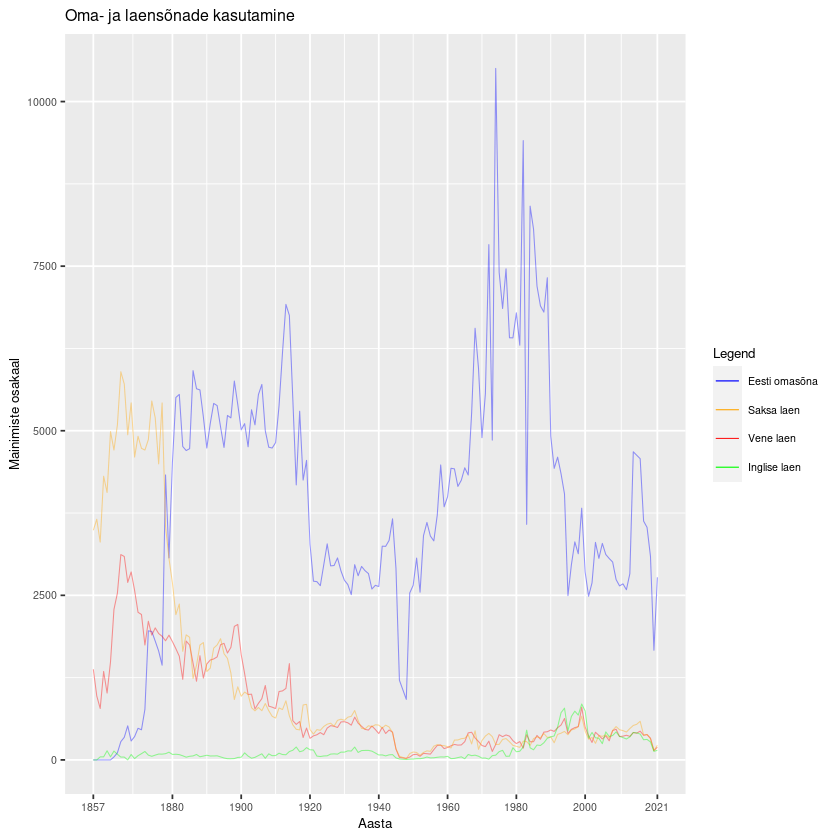

In [4]:
kokku_eesti <- c()
kokku_vene <- c()
kokku_saksa <- c()
kokku_inglise <- c()
kokku_eesti_norm <- c()
kokku_vene_norm <- c()
kokku_saksa_norm <- c()
kokku_inglise_norm <- c()
aastad_kokku_koik <- list(aastad_kokku_eesti, aastad_kokku_vene, aastad_kokku_saksa, aastad_kokku_inglise)

i <- 0 #loendur
j <- 0 #loendur listide jaoks
for (jarjend in aastad_kokku_koik) {
    j <- j+1 #loendur listide jaoks
    i <- 0 #loendur
    sonu_aastate_kaupa <- table(jarjend)
    for (aasta in koik_aastad) { #üle kõigi aastate, millest korpuses üldse tekste on
        i <- i+1 #lisame loendurile ühe
        if (aasta %in% jarjend) { #kui sel aastal on ka mainitud meie uuritavat sõna
            mitu_mainimist <- sonu_aastate_kaupa[[as.character(aasta)]] #leiab, mitu korda seda sõna sel aastal mainiti
            sonu_aastas <- wordcounts[[2]][[i]] #mitu sõna ühe aasta tekstide peale kokku oli
            #jagame selle aasta sõna mainimise arvu selle aasta kollektiivsete sõnade arvuga ja korrutame konstandiga, et tulemus oleks loetavam
            norm <- (mitu_mainimist/sonu_aastas)*10000000 
            if (j == 1) { #kui eesti omasona
                kokku_eesti_norm<- append(kokku_eesti_norm, norm) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_eesti <- append(kokku_eesti, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                }
            if (j == 2) { #kui vene laen
                kokku_vene_norm <- append(kokku_vene_norm, norm) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_vene <- append(kokku_vene, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                }
            if (j == 3) { #kui saksa laen
                kokku_saksa_norm <- append(kokku_saksa_norm, norm) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_saksa <- append(kokku_saksa, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                }
            if (j == 4) { #kui inglise laen
                kokku_inglise_norm <- append(kokku_inglise_norm, norm) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_inglise <- append(kokku_inglise, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                }
            }
        else { #kui sel aastal polnud ühtegi sõna mainimist
            if (j == 1) { #kui eesti omasona
                kokku_eesti_norm<- append(kokku_eesti_norm, 0) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_eesti <- append(kokku_eesti, 0) #lisab selle aasta sõna mainimiste arvu listi
                }
            if (j == 2) { #kui vene laen
                kokku_vene_norm <- append(kokku_vene_norm, 0) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_vene <- append(kokku_vene, 0) #lisab selle aasta sõna mainimiste arvu listi
                }
            if (j == 3) { #kui saksa laen
                kokku_saksa_norm <- append(kokku_saksa_norm, 0) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_saksa <- append(kokku_saksa, 0) #lisab selle aasta sõna mainimiste arvu listi
                }
            if (j == 4) { #kui inglise laen
                kokku_inglise_norm <- append(kokku_inglise_norm, 0) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_inglise <- append(kokku_inglise, 0) #lisab selle aasta sõna mainimiste arvu listi
                }
            }
        }
    }
colors <- c("Eesti omasõna" = "blue", "Saksa laen" = "orange", "Vene laen" = "red", "Inglise laen" = "green")
#teeme ühe suure tabeli, kus on aastad, eesti omasõna ja vene, saksa ning inglise laenude normitud arv
graafikuks <- data.frame(koik_aastad, kokku_eesti_norm, kokku_vene_norm, kokku_saksa_norm, kokku_inglise_norm) 
#teeme ühe suure tabeli, kus on aastad, eesti omasõna ja vene, saksa ning inglise laenude arv
tabeliks <- data.frame(koik_aastad, kokku_eesti, kokku_vene, kokku_saksa, kokku_inglise) 
tabeliks[nrow(tabeliks) + 1,] = c("Summa",sum(kokku_eesti), sum(kokku_vene), sum(kokku_saksa), sum(kokku_inglise)) #lisame tabelisse veergude summad
#kirjutame tabeli csv faili
write.csv(graafikuks, "kokku_normaliseeritud_tabel.csv", row.names = FALSE) 
write.csv(tabeliks, "kokku_tabel.csv", row.names = FALSE) 
#teeme normaliseeritud andmete põhjal graafiku
ggplot(graafikuks, aes(x=koik_aastad)) +
    geom_line(aes(y=kokku_eesti_norm, color="Eesti omasõna"), alpha = 0.4, size = 0.3) +
    geom_line(aes(y=kokku_vene_norm, color="Vene laen"), alpha = 0.4, size = 0.3) +
    geom_line(aes(y=kokku_saksa_norm, color="Saksa laen"), alpha = 0.4, size = 0.3) +
    geom_line(aes(y=kokku_inglise_norm, color="Inglise laen"), alpha = 0.4, size = 0.3) +
    labs( #muudame nimesid
        title = "Oma- ja laensõnade kasutamine",
        x = "Aasta",
        y = "Mainimiste osakaal",
        color = "Legend"
        ) +
    scale_color_manual(values = colors) +
    scale_x_continuous(limits = c(1857, 2021), breaks=c(1857,1880,1900,1920,1940,1960,1980,2000,2021)) + #ütleme, mis vahemik x teljel peab olema
    theme(text = element_text(size = 8)) 
ggsave("kokku_normaliseeritud_graafik.png", width = 1500, height = 800, units = "px") #salvestame graafiku png failina